In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings('ignore')
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# load the data
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
train_data.head()
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [4]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


# missing values

In [5]:
train_data.isnull().sum()
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Age - Missing Values
# data conduct

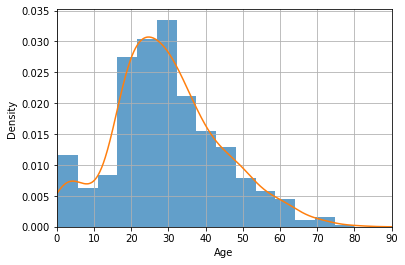

In [6]:
ax = train_data['Age'].hist(bins=15, density=True, stacked=True, alpha=0.7)

train_data['Age'].plot(kind='density')

ax.set(xlabel='Age')
plt.xlim(0, 90)
plt.grid()
plt.show()

In [7]:
train_data['Age'].mean(skipna=True)
test_data['Age'].mean(skipna=True)
train_data['Age'].median(skipna=True)
test_data['Age'].median(skipna=True)

27.0

# port description

Most boarded port:  S


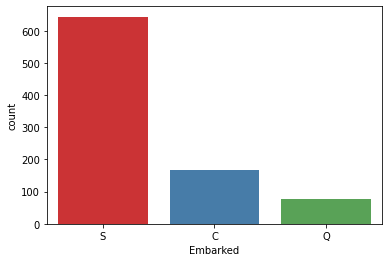

In [8]:
%matplotlib inline
sns.countplot(x='Embarked',data=train_data,palette='Set1')
print('Most boarded port: ', train_data['Embarked'].value_counts().idxmax())

# Final Description and Implementation
* age fill the null with medain numbers
* port fill the null with S
* cabin drop it.

In [9]:
train_df=train_data.copy()
test_df=test_data.copy()

train_data['Age'].fillna(train_df['Age'].median(skipna=True),inplace=True)
test_data['Age'].fillna(test_df['Age'].median(skipna=True),inplace=True)
train_data['Embarked'].fillna(train_df['Embarked'].value_counts().idxmax(),inplace=True)
test_data['Embarked'].fillna(test_df['Embarked'].value_counts().idxmax(),inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(skipna=True),inplace=True)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [10]:
train_data.isnull().sum()
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# unnecessary variable analysis
* sibsp:#of siblings/spouses 
* parch:# of parents/kids 
  * both variables are highly related
  * trun then in one variable solotravel : 0/1

In [11]:
train_data['SoloTravel'] = np.where((train_data['SibSp']+train_data['Parch'])>0,0,1)
test_data['SoloTravel']=np.where((test_data['SibSp']+test_data['Parch'])>0,0,1)
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,SoloTravel
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S,0


# remove helpless info

In [12]:
train_data.drop('SibSp',axis=1,inplace=True)
train_data.drop('Parch',axis=1,inplace=True)

test_data.drop('SibSp',axis=1,inplace=True)
test_data.drop('Parch',axis=1,inplace=True)

test_data.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,SoloTravel
0,892,3,"Kelly, Mr. James",male,34.5,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,S,0


# categorical variables
 * deal with the catogrical info: 'Pclass','Embarked','Sex'

In [13]:
train_data = pd.get_dummies(train_data,columns=["Pclass",'Embarked','Sex'],drop_first=True)
test_data = pd.get_dummies(test_data,columns=["Pclass",'Embarked','Sex'],drop_first=True)
train_data.drop('PassengerId',axis=1,inplace=True)
train_data.drop('Name',axis=1,inplace=True)
train_data.drop('Ticket',axis=1,inplace=True)

test_data.drop('Name',axis=1,inplace=True)
test_data.drop('Ticket',axis=1,inplace=True)
test_data.drop('PassengerId',axis=1,inplace=True)

test_data.head(10)

,Age,Fare,SoloTravel,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,1,1,0,1
1,47.0,7.0000,0,0,1,0,1,0
2,62.0,9.6875,1,1,0,1,0,1
3,27.0,8.6625,1,0,1,0,1,1
4,22.0,12.2875,0,0,1,0,1,0
5,14.0,9.2250,1,0,1,0,1,1
6,30.0,7.6292,1,0,1,1,0,0
7,26.0,29.0000,0,1,0,0,1,1
8,18.0,7.2292,1,0,1,0,0,0
9,21.0,24.1500,0,0,1,0,1,1


# exploratory data analysis

In [14]:
train_data.shape
test_data.shape
train_data.describe()

,Survived,Age,Fare,SoloTravel,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.361582,32.204208,0.602694,0.206510,0.551066,0.086420,0.725028,0.647587
std,0.486592,13.019697,49.693429,0.489615,0.405028,0.497665,0.281141,0.446751,0.477990
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,28.000000,14.454200,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,35.000000,31.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## eda for age variable 

(-10.0, 85.0)

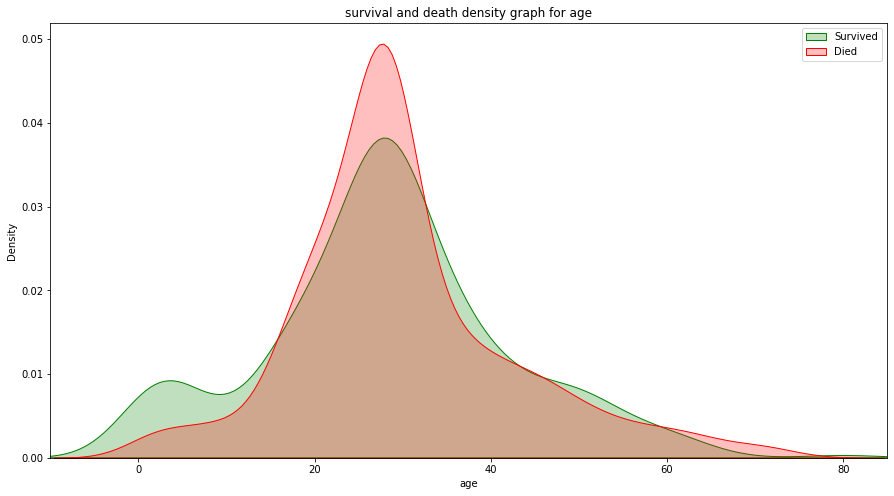

In [15]:
%matplotlib inline
plt.figure(figsize=(15,8))

ax = sns.kdeplot(train_data['Age'][train_data.Survived ==1],color='green',shade=True)
sns.kdeplot(train_data["Age"][train_data.Survived==0],color='red',shade=True)

plt.legend(['Survived','Died'])
plt.title('survival and death density graph for age')
ax.set(xlabel='age')
plt.xlim(-10,85)


## eda for fare variable

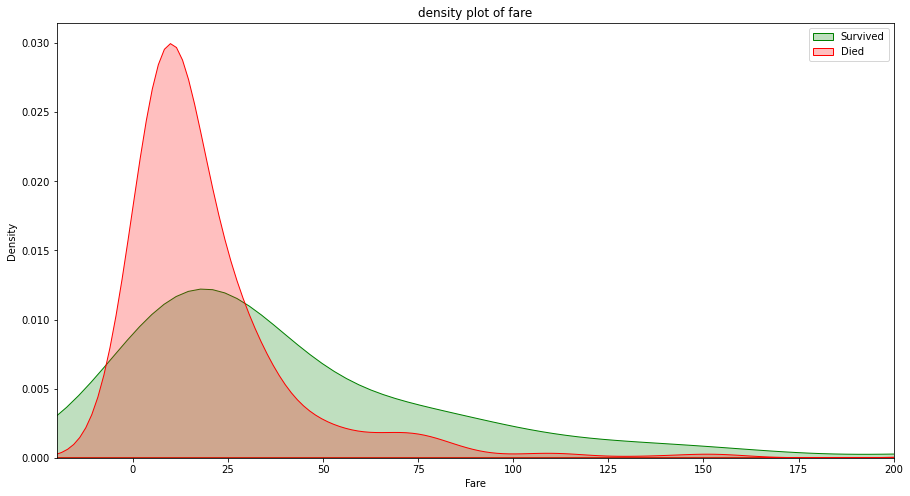

In [16]:
%matplotlib inline
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train_data['Fare'][train_data.Survived==1],color='green',shade=True)

sns.kdeplot(train_data['Fare'][train_data.Survived==0],color='red',shade=True)

plt.legend(['Survived','Died'])
plt.title('density plot of fare')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

# eda for passenger variable and famoly/solo travel

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

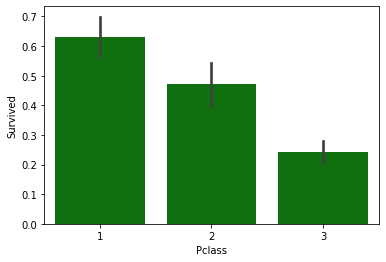

In [17]:
sns.barplot('Pclass','Survived',data=train_df,color='green')


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

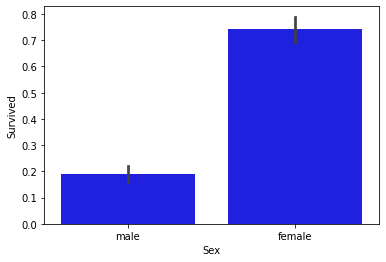

In [18]:
sns.barplot('Sex','Survived',data=train_df,color='blue')

In [19]:
train_data.drop('Survived',axis=1,inplace=True)
train_data.describe()

,Age,Fare,SoloTravel,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.361582,32.204208,0.602694,0.206510,0.551066,0.086420,0.725028,0.647587
std,13.019697,49.693429,0.489615,0.405028,0.497665,0.281141,0.446751,0.477990
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,14.454200,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,35.000000,31.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# feature scailing

In [20]:
cols = train_data.columns

cols

Index(['Age', 'Fare', 'SoloTravel', 'Pclass_2', 'Pclass_3', 'Embarked_Q',
       'Embarked_S', 'Sex_male'],
      dtype='object')

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_data = scaler.fit_transform(train_data)
test_data = scaler.fit_transform(test_data)
train_data = pd.DataFrame(train_data,columns=[cols])
test_data = pd.DataFrame(test_data,columns=[cols])
train_data.head()

,Age,Fare,SoloTravel,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,1.0
1,0.472229,0.139136,0.0,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.015469,1.0,0.0,1.0,0.0,1.0,0.0
3,0.434531,0.103644,0.0,0.0,0.0,0.0,1.0,0.0
4,0.434531,0.015713,1.0,0.0,1.0,0.0,1.0,1.0


# model and predictions

In [22]:
from sklearn.ensemble import RandomForestClassifier
y = train_df['Survived']
X = train_data
X_test = test_data
model = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=1)
model.fit(X,y)
predictions = model.predict(X_test)

In [23]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [24]:
# submission
output = pd.DataFrame({'PassengerId':test_df.PassengerId,'Survived':predictions})
output.to_csv('submission.csv',index=False)
print('submission successfully saved!')


submission successfully saved!
